<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Scatter Plot**


Estimated time needed: **45** minutes


## Overview

In this lab, you will focus on creating and interpreting scatter plots to visualize relationships between variables and trends in the dataset. The provided dataset will be directly loaded into a pandas DataFrame, and various scatter plot-related visualizations will be created to explore developer trends, compensation, and preferences.



## Objectives


In this lab, you will:

- Create and analyze scatter plots to examine relationships between variables.

- Use scatter plots to identify trends and patterns in the dataset.

- Focus on visualizations centered on scatter plots for better data-driven insights.


## Setup: Working with the Database



**Install and import the required libraries**


In [1]:
#!pip install pandas
#!pip install matplotlib

import pandas as pd
import matplotlib.pyplot as plt

#### Step 1: Load the dataset


In [2]:
file_path = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv"

df = pd.read_csv(file_path)



### Task 1: Exploring Relationships with Scatter Plots



#### 1. Scatter Plot for Age vs. Job Satisfaction



Visualize the relationship between respondents' age (`Age`) and job satisfaction (`JobSatPoints_6`). Use this plot to identify any patterns or trends.




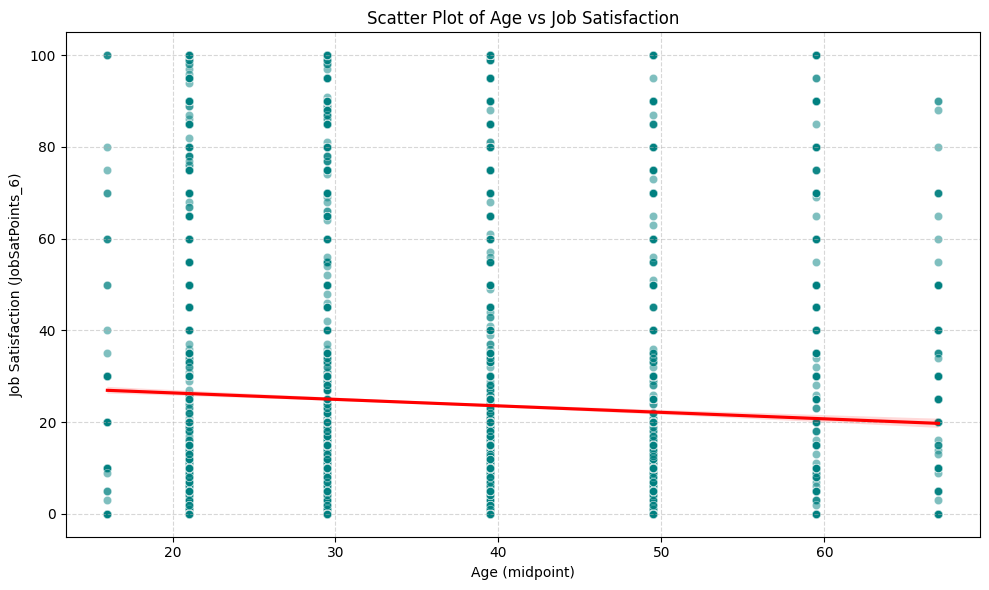

In [3]:
## Write your code here
import seaborn as sns

# Step 1: Map Age categories to numeric midpoints
age_mapping = {
    'Under 18 years old': 16,
    '18-24 years old': 21,
    '25-34 years old': 29.5,
    '35-44 years old': 39.5,
    '45-54 years old': 49.5,
    '55-64 years old': 59.5,
    '65 years or older': 67,
    'Prefer not to say': None
}
df['AgeNumeric'] = df['Age'].map(age_mapping)

# Step 2: Convert JobSatPoints_6 to numeric
df['JobSatPoints_6'] = pd.to_numeric(df['JobSatPoints_6'], errors='coerce')

# Step 3: Drop rows with missing AgeNumeric or JobSatPoints_6
df_clean = df.dropna(subset=['AgeNumeric', 'JobSatPoints_6'])

# Step 4: Plot scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=df_clean,
    x='AgeNumeric',
    y='JobSatPoints_6',
    alpha=0.5,
    color='teal'
)

# Optional: Add trend line
sns.regplot(
    data=df_clean,
    x='AgeNumeric',
    y='JobSatPoints_6',
    scatter=False,
    color='red'
)

plt.title('Scatter Plot of Age vs Job Satisfaction')
plt.xlabel('Age (midpoint)')
plt.ylabel('Job Satisfaction (JobSatPoints_6)')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

#### 2. Scatter Plot for Compensation vs. Job Satisfaction


Explore the relationship between yearly compensation (`ConvertedCompYearly`) and job satisfaction (`JobSatPoints_6`) using a scatter plot.


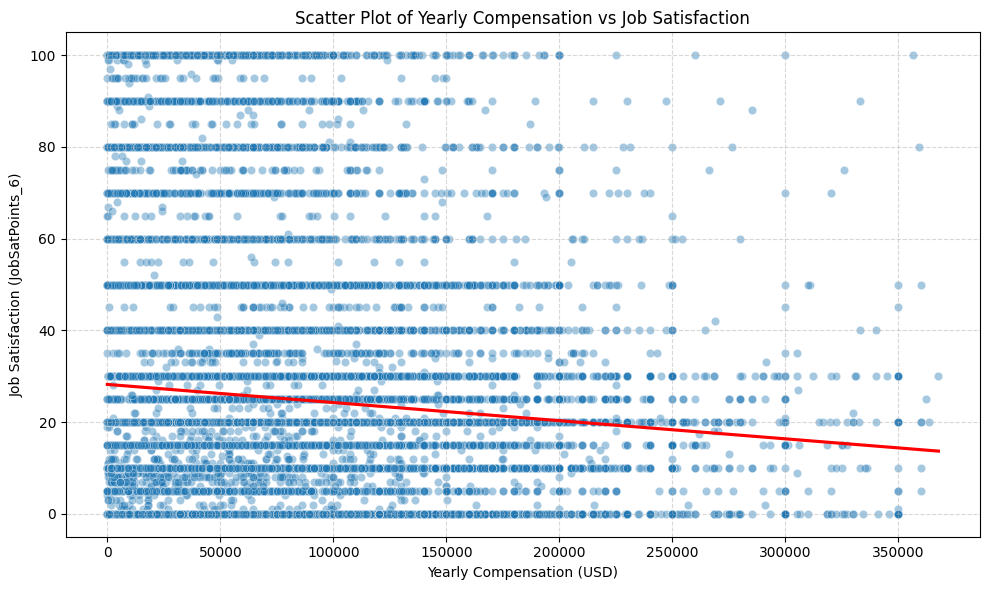

In [4]:
## Write your code here
# Step 1: Ensure numeric types
df['ConvertedCompYearly'] = pd.to_numeric(df['ConvertedCompYearly'], errors='coerce')
df['JobSatPoints_6'] = pd.to_numeric(df['JobSatPoints_6'], errors='coerce')

# Step 2: Drop missing values
df_scatter = df.dropna(subset=['ConvertedCompYearly', 'JobSatPoints_6'])

# Step 3: Remove top 1% outliers for readability
df_scatter = df_scatter[df_scatter['ConvertedCompYearly'] < df_scatter['ConvertedCompYearly'].quantile(0.99)]

# Step 4: Plot scatter
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=df_scatter,
    x='ConvertedCompYearly',
    y='JobSatPoints_6',
    alpha=0.4
)

# Optional: Add a regression line
sns.regplot(
    data=df_scatter,
    x='ConvertedCompYearly',
    y='JobSatPoints_6',
    scatter=False,
    color='red',
    ci=None
)

plt.title('Scatter Plot of Yearly Compensation vs Job Satisfaction')
plt.xlabel('Yearly Compensation (USD)')
plt.ylabel('Job Satisfaction (JobSatPoints_6)')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

### Task 2: Enhancing Scatter Plots


#### 1. Scatter Plot with Trend Line for Age vs. Job Satisfaction



Add a regression line to the scatter plot of Age vs. JobSatPoints_6 to highlight trends in the data.


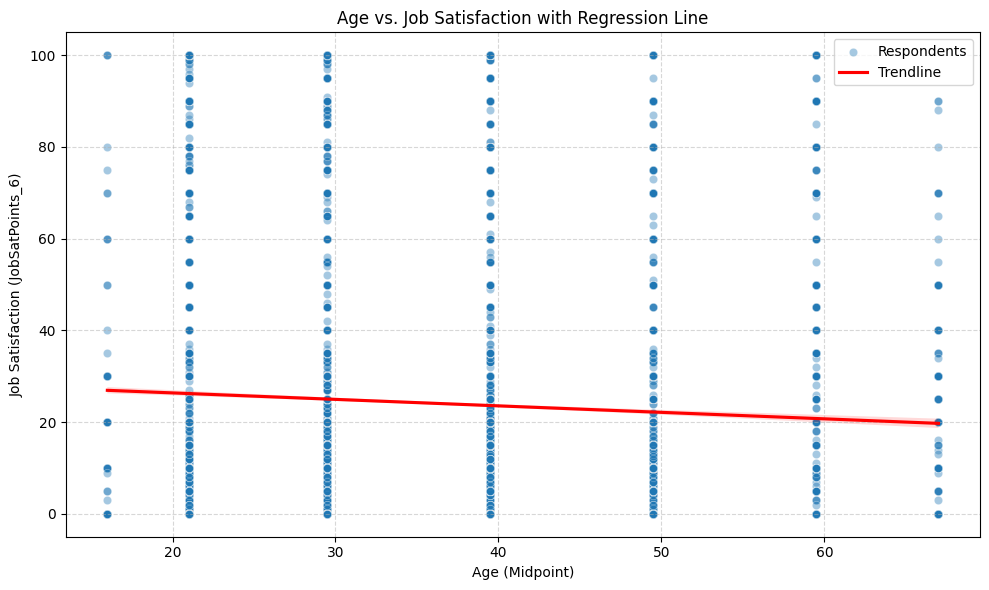

In [5]:
## Write your code here
# Map Age to numeric midpoint
age_mid_map = {
    'Under 18 years old': 16,
    '18-24 years old': 21,
    '25-34 years old': 29.5,
    '35-44 years old': 39.5,
    '45-54 years old': 49.5,
    '55-64 years old': 59.5,
    '65 years or older': 67,
    'Prefer not to say': None
}

# Apply mapping
df['AgeNumeric'] = df['Age'].map(age_mid_map)
df['JobSatPoints_6'] = pd.to_numeric(df['JobSatPoints_6'], errors='coerce')

# Drop missing values
df_clean = df.dropna(subset=['AgeNumeric', 'JobSatPoints_6'])

# Plot with regression line
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_clean, x='AgeNumeric', y='JobSatPoints_6', alpha=0.4, label='Respondents')
sns.regplot(data=df_clean, x='AgeNumeric', y='JobSatPoints_6', scatter=False, color='red', label='Trendline')

plt.title('Age vs. Job Satisfaction with Regression Line')
plt.xlabel('Age (Midpoint)')
plt.ylabel('Job Satisfaction (JobSatPoints_6)')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

#### 2. Scatter Plot for Age vs. Work Experience


Visualize the relationship between Age (`Age`) and Work Experience (`YearsCodePro`) using a scatter plot.


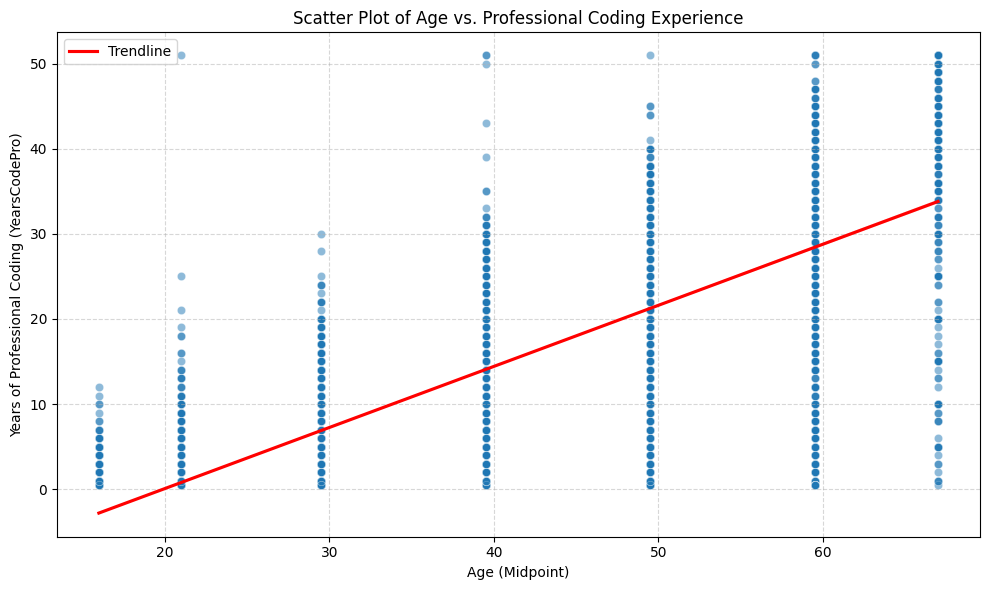

In [6]:
## Write your code here
# Step 1: Map Age to numeric midpoints
age_mid_map = {
    'Under 18 years old': 16,
    '18-24 years old': 21,
    '25-34 years old': 29.5,
    '35-44 years old': 39.5,
    '45-54 years old': 49.5,
    '55-64 years old': 59.5,
    '65 years or older': 67,
    'Prefer not to say': None
}
df['AgeNumeric'] = df['Age'].map(age_mid_map)

# Step 2: Convert YearsCodePro to numeric
def convert_years(x):
    if isinstance(x, str):
        if 'Less than' in x:
            return 0.5
        elif 'More than' in x:
            return 51
    try:
        return float(x)
    except:
        return None

df['YearsCodePro'] = df['YearsCodePro'].apply(convert_years)

# Step 3: Drop missing values
df_clean = df.dropna(subset=['AgeNumeric', 'YearsCodePro'])

# Step 4: Scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_clean, x='AgeNumeric', y='YearsCodePro', alpha=0.5)

# Optional: Add regression line
sns.regplot(data=df_clean, x='AgeNumeric', y='YearsCodePro', scatter=False, color='red', label='Trendline')

plt.title('Scatter Plot of Age vs. Professional Coding Experience')
plt.xlabel('Age (Midpoint)')
plt.ylabel('Years of Professional Coding (YearsCodePro)')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.legend()
plt.show()

### Task 3: Combining Scatter Plots with Additional Features


#### 1. Bubble Plot of Compensation vs. Job Satisfaction with Age as Bubble Size



Create a bubble plot to explore the relationship between yearly compensation (`ConvertedCompYearly`) and job satisfaction (`JobSatPoints_6`), with bubble size representing age.


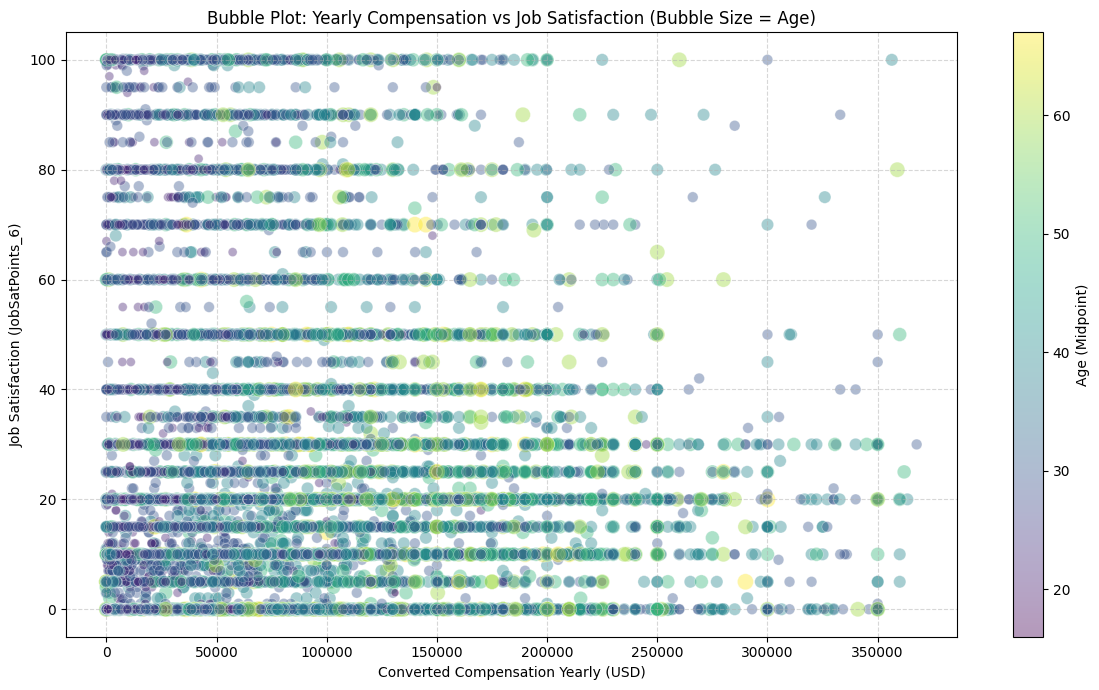

In [7]:
## Write your code here
# Step 1: Convert Age to numeric midpoints
age_mid_map = {
    'Under 18 years old': 16,
    '18-24 years old': 21,
    '25-34 years old': 29.5,
    '35-44 years old': 39.5,
    '45-54 years old': 49.5,
    '55-64 years old': 59.5,
    '65 years or older': 67,
    'Prefer not to say': None
}
df['AgeNumeric'] = df['Age'].map(age_mid_map)

# Step 2: Ensure columns are numeric
df['ConvertedCompYearly'] = pd.to_numeric(df['ConvertedCompYearly'], errors='coerce')
df['JobSatPoints_6'] = pd.to_numeric(df['JobSatPoints_6'], errors='coerce')

# Step 3: Drop missing values
df_bubble = df.dropna(subset=['ConvertedCompYearly', 'JobSatPoints_6', 'AgeNumeric'])

# Optional: Remove outliers in compensation for readability
df_bubble = df_bubble[df_bubble['ConvertedCompYearly'] < df_bubble['ConvertedCompYearly'].quantile(0.99)]

# Step 4: Plot bubble chart
plt.figure(figsize=(12, 7))
plt.scatter(
    x=df_bubble['ConvertedCompYearly'],
    y=df_bubble['JobSatPoints_6'],
    s=df_bubble['AgeNumeric'] * 2,  # Bubble size based on age
    alpha=0.4,
    c=df_bubble['AgeNumeric'],      # Color also based on age
    cmap='viridis',
    edgecolors='w',
    linewidth=0.5
)

plt.colorbar(label='Age (Midpoint)')
plt.title('Bubble Plot: Yearly Compensation vs Job Satisfaction (Bubble Size = Age)')
plt.xlabel('Converted Compensation Yearly (USD)')
plt.ylabel('Job Satisfaction (JobSatPoints_6)')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

#### 2. Scatter Plot for Popular Programming Languages by Job Satisfaction


Visualize the popularity of programming languages (`LanguageHaveWorkedWith`) against job satisfaction using a scatter plot. Use points to represent satisfaction levels for each language.


C:\Users\Rajveer Kaur\AppData\Local\Temp\ipykernel_16504\3924571313.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_lang['LanguageList'] = df_lang['LanguageHaveWorkedWith'].str.split(';')


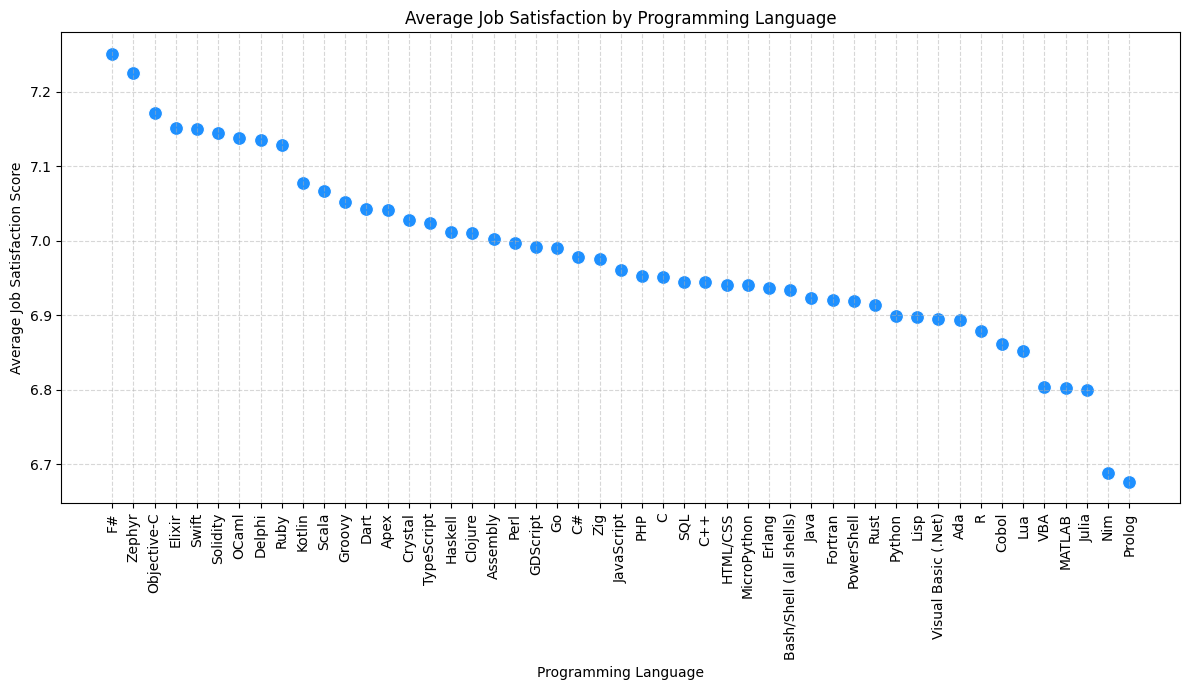

In [9]:
## Write your code here
# Step 1: Ensure JobSat is numeric
df['JobSat'] = pd.to_numeric(df['JobSat'], errors='coerce')

# Step 2: Drop rows where LanguageHaveWorkedWith or JobSat is missing
df_lang = df.dropna(subset=['LanguageHaveWorkedWith', 'JobSat'])

# Step 3: Split languages and explode
df_lang['LanguageList'] = df_lang['LanguageHaveWorkedWith'].str.split(';')
df_exploded = df_lang.explode('LanguageList')
df_exploded['LanguageList'] = df_exploded['LanguageList'].str.strip()  # Remove extra spaces

# Step 4: Group by language and calculate average JobSat
language_satisfaction = df_exploded.groupby('LanguageList')['JobSat'].mean().reset_index()

# Step 5: Sort by average satisfaction (optional)
language_satisfaction = language_satisfaction.sort_values(by='JobSat', ascending=False)

# Step 6: Plot
plt.figure(figsize=(12, 7))
sns.scatterplot(data=language_satisfaction, x='LanguageList', y='JobSat', s=100, color='dodgerblue')

plt.xticks(rotation=90)
plt.title('Average Job Satisfaction by Programming Language')
plt.xlabel('Programming Language')
plt.ylabel('Average Job Satisfaction Score')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

### Task 4: Scatter Plot Comparisons Across Groups


#### 1. Scatter Plot for Compensation vs. Job Satisfaction by Employment Type


Visualize the relationship between yearly compensation (`ConvertedCompYearly`) and job satisfaction (`JobSatPoints_6`), categorized by employment type (`Employment`). Use color coding or markers to differentiate between employment types.


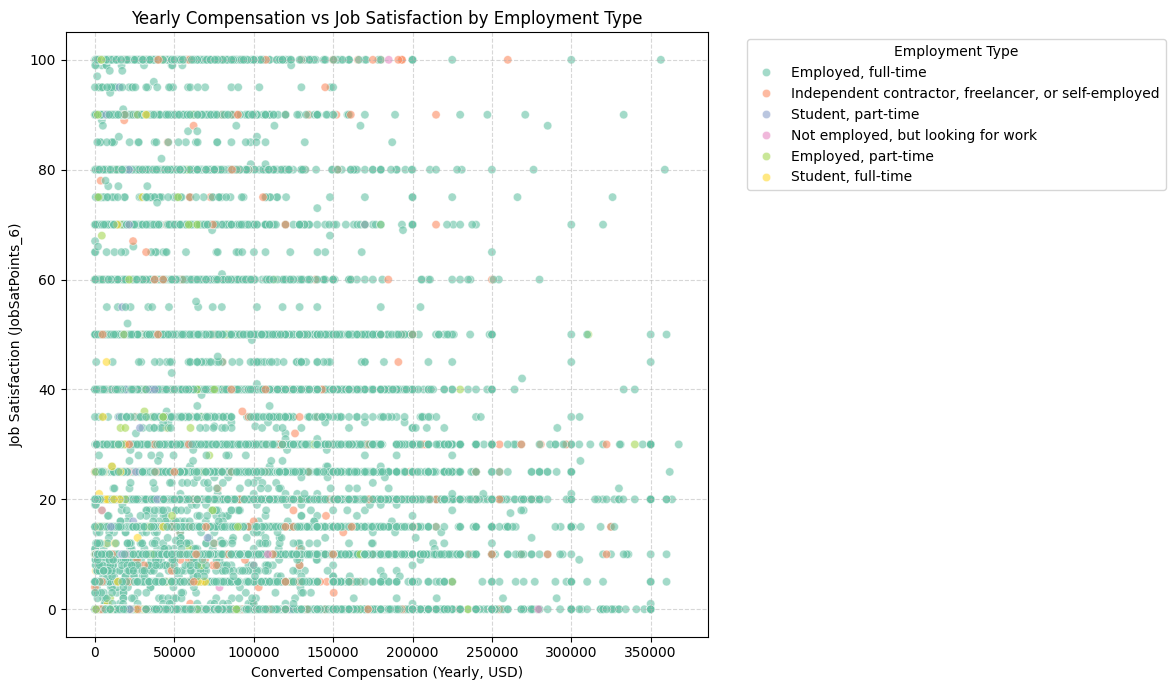

In [11]:
## Write your code here

# Step 1: Extract primary employment type (first listed one)
df['PrimaryEmployment'] = df['Employment'].str.split(';').str[0].str.strip()

# Step 2: Ensure numerical columns
df['ConvertedCompYearly'] = pd.to_numeric(df['ConvertedCompYearly'], errors='coerce')
df['JobSatPoints_6'] = pd.to_numeric(df['JobSatPoints_6'], errors='coerce')

# Step 3: Drop missing values
df_clean = df.dropna(subset=['ConvertedCompYearly', 'JobSatPoints_6', 'PrimaryEmployment'])

# Step 4: Filter out top 1% compensation for readability
df_clean = df_clean[df_clean['ConvertedCompYearly'] < df_clean['ConvertedCompYearly'].quantile(0.99)]

# Step 5: Plot
plt.figure(figsize=(12, 7))
sns.scatterplot(
    data=df_clean,
    x='ConvertedCompYearly',
    y='JobSatPoints_6',
    hue='PrimaryEmployment',
    palette='Set2',
    alpha=0.6
)

plt.title('Yearly Compensation vs Job Satisfaction by Employment Type')
plt.xlabel('Converted Compensation (Yearly, USD)')
plt.ylabel('Job Satisfaction (JobSatPoints_6)')
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend(title='Employment Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


#### 2. Scatter Plot for Work Experience vs. Age Group by Country


Compare work experience (`YearsCodePro`) across different age groups (`Age`) and countries (`Country`). Use colors to represent different countries and markers for age groups.


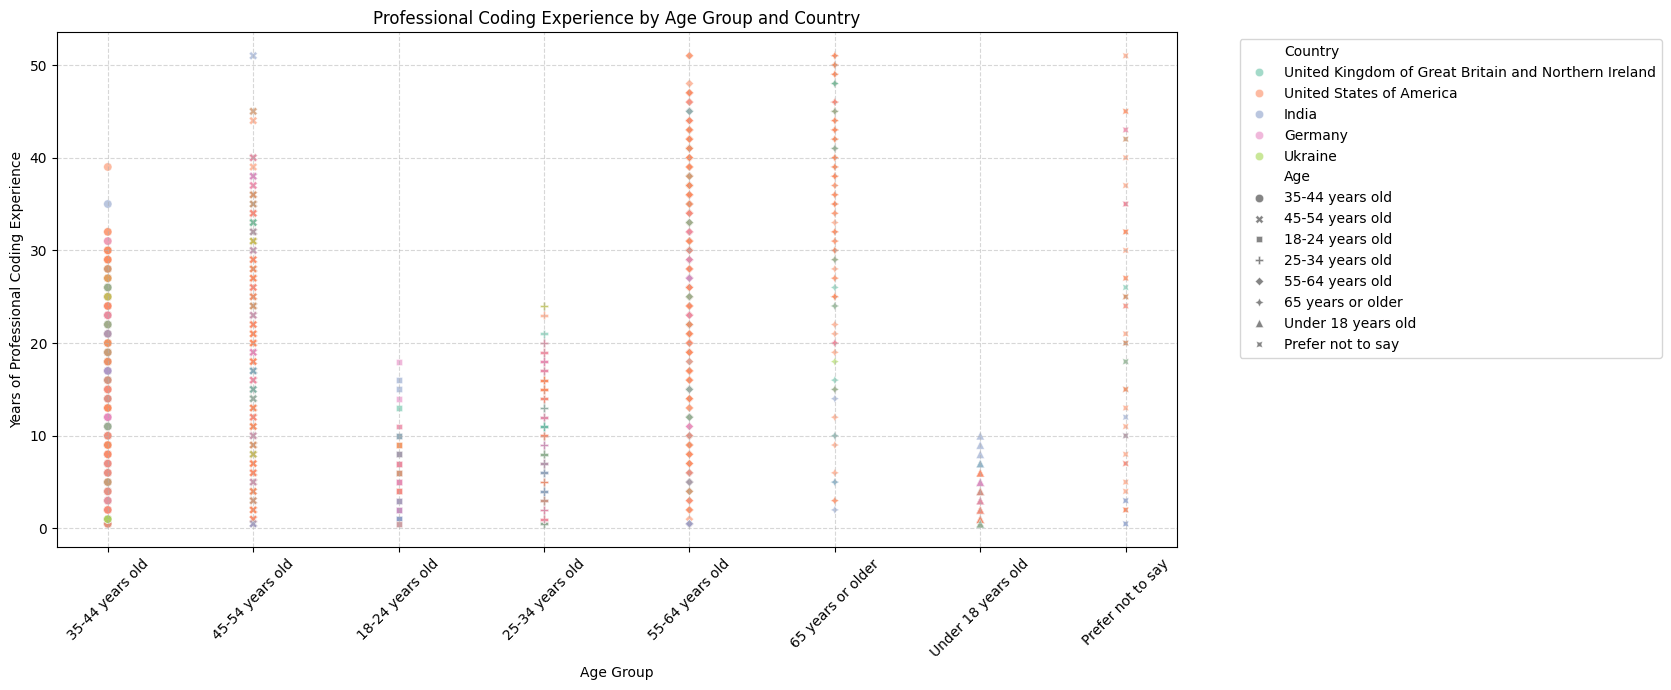

In [12]:
## Write your code here

import numpy as np

# Step 1: Convert YearsCodePro to numeric
def convert_years(x):
    if isinstance(x, str):
        if 'Less than' in x:
            return 0.5
        elif 'More than' in x:
            return 51
    try:
        return float(x)
    except:
        return np.nan

df['YearsCodeProNum'] = df['YearsCodePro'].apply(convert_years)

# Step 2: Filter valid entries
df_filtered = df.dropna(subset=['YearsCodeProNum', 'Age', 'Country'])

# Optional: Focus on top 5 countries by respondent count
top_countries = df_filtered['Country'].value_counts().nlargest(5).index
df_filtered = df_filtered[df_filtered['Country'].isin(top_countries)]

# Step 3: Plotting
plt.figure(figsize=(12, 7))
sns.scatterplot(
    data=df_filtered,
    x='Age',
    y='YearsCodeProNum',
    hue='Country',
    style='Age',           # Marker type by age group
    palette='Set2',
    alpha=0.6
)

plt.title('Professional Coding Experience by Age Group and Country')
plt.xlabel('Age Group')
plt.ylabel('Years of Professional Coding Experience')
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


### Final Step: Review


With these scatter plots, you will have analyzed data relationships across multiple dimensions, including compensation, job satisfaction, employment types, and demographics, to uncover meaningful trends in the developer community.


### Summary


After completing this lab, you will be able to:
- Analyze how numerical variables relate across specific groups, such as employment types and countries.
- Use scatter plots effectively to represent multiple variables with color, size, and markers.
- Gain insights into compensation, satisfaction, and demographic trends using advanced scatter plot techniques.


## Authors:
Ayushi Jain


### Other Contributors:
- Rav Ahuja
- Lakshmi Holla
- Malika


<!--## Change Log
|Date (YYYY-MM-DD)|Version|Changed By|Change Description|
|-|-|-|-|               
|2024-10-07|1.2|Madhusudan Moole|Reviewed and updated lab|                                                                                      
|2024-10-06|1.0|Raghul Ramesh|Created lab|-->


Copyright © IBM Corporation. All rights reserved.
